In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn import metrics

# Parte 1: Conocer la base

## 1. Leer y guardar base

In [2]:
df_train = pd.read_csv('train.csv')

## 2.Revisar el contenido de la base con head y tail

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## 3. Revisamos titulos de columnas ##

Revisamos que no tengan espacios antes o después del nombre o que contengan algun caracter que nos dificulte el analisis

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 4. Revisamos el tipo de datos de cada columna 

In [6]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 5. Revisamos la forma

Que dimensiones tiene tanto en columnas y renglones

In [7]:
print('La forma de la base es',df_train.shape)
print('Tiene en total ',df_train.shape[0],'registros')
print('Tiene en total', df_train.shape[1], 'columnas')

La forma de la base es (1460, 81)
Tiene en total  1460 registros
Tiene en total 81 columnas


## 6. Revisamos la info de los registros

Es similar al paso 4 pero aquí lleva conteo del número de columnas y agrega cuantos valores NO Nulos

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Parte 2: Limpieza de Datos

## 7. Revisar columnas con nulos

Como el paso anterior nos mostró que existen muchas columnas con valores nulos, es necesario revisar y eliminar aquellas columnas que tengan muchos nulos ya que no se puede estar llenando ese volumen de datos. 

In [9]:
Total_Nulos = df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending = False)
Porcentaje_Nulos = round((Total_Nulos / (len(df_train)))*100, 2)

tabla_nulos = pd.concat([Total_Nulos, Porcentaje_Nulos], axis = 1)
tabla_nulos.columns = ['Total_Nulos', 'Porcentaje_Nulos']
tabla_nulos

,Total_Nulos,Porcentaje_Nulos
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


Vemos que existen columnas donde faltan la mitado o más valores, estos serán eliminados. Tendremos un nuevo df para poder regresar en caso de ser necesario

In [10]:
df_train2 = df_train.copy()
df_train2 = df_train2[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street','LotShape', 'LandContour', 'Utilities',
                     'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
                     'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st',
                     'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond',
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                     'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                     'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                     'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType','GarageYrBlt', 'GarageFinish','GarageCars',
                     'GarageArea', 'GarageQual','GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
                     '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SaleType','SaleCondition','SalePrice']]

df_train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## 8.  Revisión de renglones con Nulos

Al todavía tener registros en renglones con nulos, eliminamos aquellos que representan el mayor volumen

In [11]:
Total_Nulos2 = df_train2.isnull().sum()[df_train2.isnull().sum()>0].sort_values(ascending = False)
Total_Nulos2

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

Eliminaremos todos aquellos en Lot Frontage y después valoraremos cuantos registros se quedaron y de ser necesario hacer otro drop

In [12]:
GarageCond_nulls = df_train2 [df_train2['LotFrontage'].isnull() == True]
df_train3 = df_train2.drop(GarageCond_nulls.index, axis = 0)
print ('registros iniciales:', len(df_train2))
print ('registros finales:', len(df_train3))


registros iniciales: 1460
registros finales: 1201


In [13]:
Total_Nulos3 = df_train3.isnull().sum()[df_train3.isnull().sum()>0].sort_values(ascending = False)
Total_Nulos3

GarageType      74
GarageYrBlt     74
GarageFinish    74
GarageQual      74
GarageCond      74
BsmtExposure    32
BsmtFinType2    32
BsmtQual        31
BsmtCond        31
BsmtFinType1    31
MasVnrType       6
MasVnrArea       6
Electrical       1
dtype: int64

Vemos que siguen existiendo los nulls por lo que se verá eliminar aquellos con más registros

In [14]:
GarageType_nulls = df_train3 [df_train3['GarageType'].isnull() == True]
df_train4 = df_train3.drop(GarageType_nulls.index, axis = 0)
print ('registros iniciales:', len(df_train2))
print ('registros medio:', len(df_train3))
print ('registros finales:', len(df_train4))


registros iniciales: 1460
registros medio: 1201
registros finales: 1127


In [15]:
Total_Nulos4 = df_train4.isnull().sum()[df_train4.isnull().sum()>0].sort_values(ascending = False)
Total_Nulos4

BsmtExposure    25
BsmtFinType2    25
BsmtQual        24
BsmtCond        24
BsmtFinType1    24
MasVnrType       6
MasVnrArea       6
Electrical       1
dtype: int64

Esta última eliminación nos ayudo a reducir de manera considerable los Nulls por lo que ya nos podemos quedar con la base resultante de registros

## 9. Llenar valores nulos.

Los registros nulos con los que se cuentan se estarán llenando, puede ser de dos maneras:

 a) Promedios
 
 b) Moda

En este caso como no podemos tener valores con pedazos (ej: 3.3, 4.1) por lo que usamos las modas 

In [16]:
#Utilizamos la última lista donde nos quedaron los nulos después del drop
for columnas in Total_Nulos4.index:
    #Aquí lo que buscamos en la lista son los valores Object 
    if df_train4[columnas].dtype == 'object':
        #Ponemos que guarde el valor 0 que es la primer moda, recodando que las modas pueden ser más de 1
        valores_nuevos = str(df_train4[columnas].mode()[0])
    else:
        #Como los int y floats pueden ser floats, los juntamos en los floats
        valores_nuevos = float(df_train4[columnas].mode()[0])
    #Ya con los valores (modas) guardados para cada columna, llenamos los na faltantes
    df_train4[columnas] = df_train4[columnas].fillna(valores_nuevos)

#Solamente comprobamos que efectivamente no haya más valores nulos
Total_Nulos4 = df_train4.isnull().sum()[df_train4.isnull().sum()>0].sort_values(ascending = False)
Total_Nulos4

Series([], dtype: int64)

## 10. Seleccionar columnas para mantener.

Debido a que sigue siendo una matriz extensa de datos, nos quedaremos con aquellos que toman mayor relevancia, tengan correlaciones y que puedan ayudar a realizar predicciones.

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df_train4.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Existen columnas que aunque no contenían nulos, no son de utilidad ya que están llenas con 0s y se decide eliminar.

Estas son:
BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea

Adiciona, se han eliminado aquellos que no traen valor después de revisar data_description. Estas son:
'Id', 'MSSubClass','LandSlope','Exterior2nd','KitchenAbvGr','GarageType','GarageYrBlt','GarageFinish', 'PavedDrive'


In [19]:
df_train4.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [20]:
columnas_relevantes = ['MSZoning', 'LotFrontage', 'LotArea', 'Street','LotShape', 'Utilities', 'LotConfig','Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType','HouseStyle','OverallQual', 'OverallCond', 'YearBuilt',
                       'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','MasVnrType', 'MasVnrArea','ExterQual',
                       'ExterCond', 'Foundation','BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                       'BsmtFinType2','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC','CentralAir', 
                       'Electrical', '1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                       'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional','Fireplaces', 
                       'GarageCars', 'GarageArea', 'GarageQual','GarageCond','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                       '3SsnPorch','ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold', 'SaleType','SaleCondition','SalePrice']

df_train5 = df_train4.copy()
df_train5 =df_train5[columnas_relevantes]
print('Forma antes de eliminar',df_train4.shape)
print('Forma después de eliminar',df_train5.shape)

Forma antes de eliminar (1127, 76)
Forma después de eliminar (1127, 66)


# Parte 3: Información relevante

## 11. Revisaremos las correlaciones respecto al precio

Debido a que en una venta de casa el precio es lo relevante, lo tomaremos para definir que variables están más correlacionadas con nuestra base actual

In [21]:
mayor_correlacion_precio = df_train5.corr().SalePrice.sort_values(ascending = False)
mayor_correlacion_precio = mayor_correlacion_precio[mayor_correlacion_precio >0.5]
mayor_correlacion_precio

SalePrice       1.000000
OverallQual     0.799069
GrLivArea       0.704202
GarageCars      0.648035
GarageArea      0.620812
TotalBsmtSF     0.617345
1stFlrSF        0.609671
FullBath        0.565315
TotRmsAbvGrd    0.544031
YearBuilt       0.525195
YearRemodAdd    0.520913
Name: SalePrice, dtype: float64

In [22]:
correlaciones = df_train5.corr().loc[mayor_correlacion_precio.index, mayor_correlacion_precio.index]
correlaciones

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.799069,0.704202,0.648035,0.620812,0.617345,0.609671,0.565315,0.544031,0.525195,0.520913
OverallQual,0.799069,1.000000,0.606944,0.594978,0.552446,0.565761,0.516054,0.576511,0.447723,0.590791,0.571944
GrLivArea,0.704202,0.606944,1.000000,0.494887,0.487904,0.464377,0.560597,0.614504,0.823793,0.204875,0.289624
GarageCars,0.648035,0.594978,0.494887,1.000000,0.839818,0.461317,0.470236,0.520694,0.422642,0.532746,0.463155
GarageArea,0.620812,0.552446,0.487904,0.839818,1.000000,0.523317,0.522223,0.445180,0.380526,0.471922,0.408310
TotalBsmtSF,0.617345,0.565761,0.464377,0.461317,0.523317,1.000000,0.836835,0.330150,0.281844,0.409777,0.309803
1stFlrSF,0.609671,0.516054,0.560597,0.470236,0.522223,0.836835,1.000000,0.373935,0.403176,0.309147,0.281842
FullBath,0.565315,0.576511,0.614504,0.520694,0.445180,0.330150,0.373935,1.000000,0.539686,0.500643,0.467794
TotRmsAbvGrd,0.544031,0.447723,0.823793,0.422642,0.380526,0.281844,0.403176,0.539686,1.000000,0.118799,0.179377
YearBuilt,0.525195,0.590791,0.204875,0.532746,0.471922,0.409777,0.309147,0.500643,0.118799,1.000000,0.625157


Veremos de manera visual como se comporta la correlación respecto al Precio

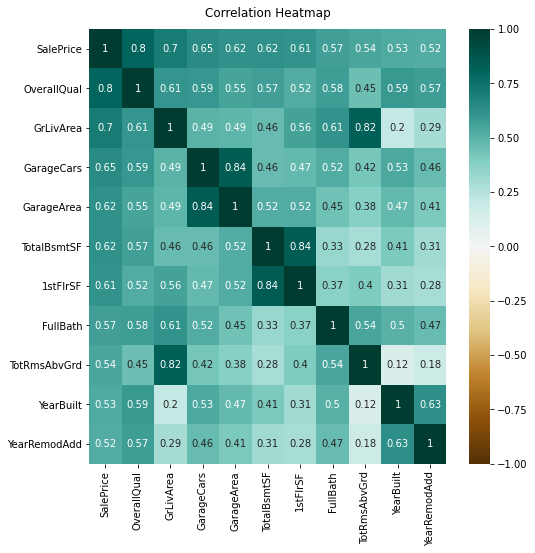

In [23]:
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(correlaciones, annot = True,  vmin=-1, vmax=1,  cmap='BrBG')
heatmap.set_title('Correlation Heatmap', pad=12);

# plt.savefig('Correlation_Heatmap.png', dpi=300, bbox_inches='tight')

Se puede reducir la matriz a un triangulo debido a que los valores se repiten. Se guarda gráfico para ppt.

<ipython-input-24-699207717f70>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlaciones, dtype = np.bool))


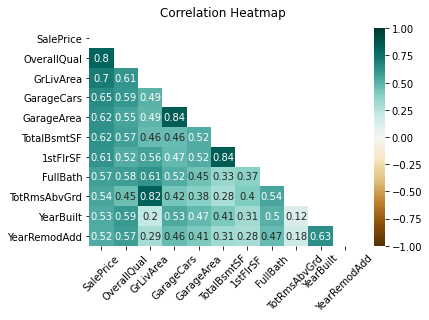

In [24]:
mask = np.triu(np.ones_like(correlaciones, dtype = np.bool))
heatmap = sns.heatmap(correlaciones, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.xticks(rotation=45);
plt.savefig('Correlation_Heatmap.png', dpi=300, bbox_inches='tight');

Existen diferentes correlaciones positivas respecto al precio, por lo que se exploran algunas

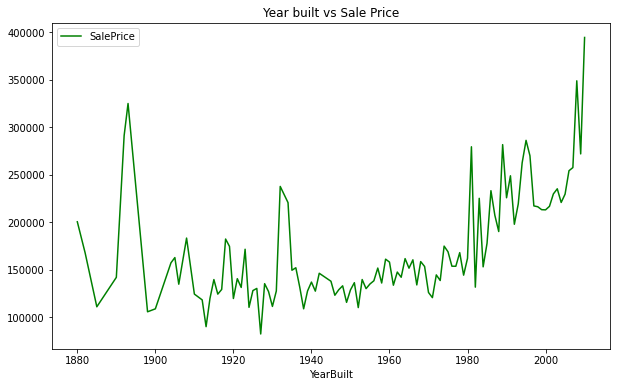

In [25]:
YearBuilt = df_train5[['YearBuilt','SalePrice']].groupby('YearBuilt').mean().plot(kind='line', title ='Year built vs Sale Price', color = 'green', figsize = (10,6))
plt.savefig('Year built vs Sale Price.png', dpi=300, bbox_inches='tight');

Orden por los vecindarios respecto al precio

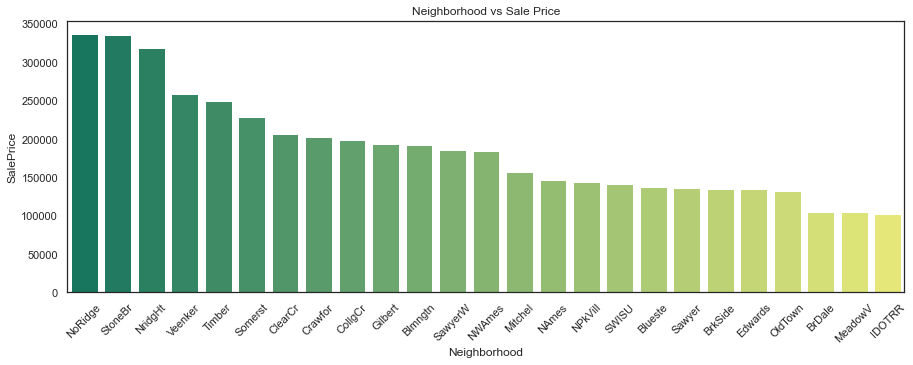

In [26]:
colonia = df_train5.groupby('Neighborhood').agg({'SalePrice':'mean'}).sort_values('SalePrice', ascending=False).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('white')
ax = sns.barplot(x="Neighborhood", y="SalePrice", data=colonia, palette = "summer")
plt.xticks(rotation=45);
plt.title('Neighborhood vs Sale Price')
plt.savefig('Neighborhood vs Sale Price.png', dpi=300, bbox_inches='tight');

La principal correlación respecto al precio es la calidad de los acabados.

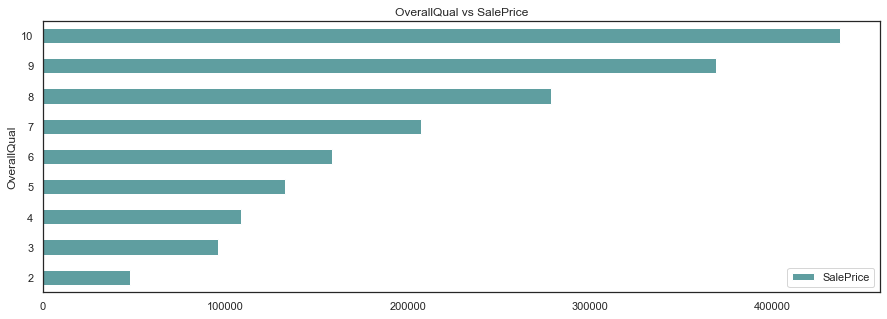

In [27]:
calidad_terminados =df_train5[['OverallQual','SalePrice']].groupby('OverallQual').mean().plot(kind='barh', title ='OverallQual vs SalePrice', color = '#5F9EA0' )
plt.savefig('OverallQual vs Sale Price.png', dpi=300, bbox_inches='tight');

In [28]:
df_train6 = df_train5.copy()
df_train6['OverallQual'] = df_train6['OverallQual'].astype(np.int64, errors = 'ignore')

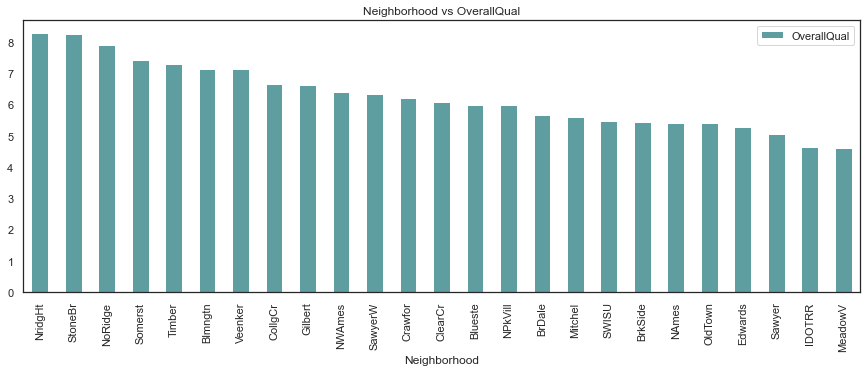

In [29]:
df_train6[['Neighborhood','OverallQual']].groupby('Neighborhood').mean().sort_values('OverallQual', ascending=False).plot(kind='bar', title ='Neighborhood vs OverallQual', color = '#5F9EA0' )
plt.savefig('Neighborhood vs OverallQual', dpi=300, bbox_inches='tight');

In [30]:
df_train6.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],

# Parte 4

## 12 ANOVA

Se revisa si existe relación entre el precio y las condiciones de la casa, es decir si afecta los servicios

In [31]:
model_prices = ols("SalePrice ~ C(Neighborhood) * C(Utilities == 'AllPub')", data = df_train6).fit()
anova_table = sm.stats.anova_lm(model_prices, typ = 2 )
anova_table

c:\users\charl\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Neighborhood),1.299921e+09,24.0,0.017032,1.000000
C(Utilities == 'AllPub'),4.977619e+06,1.0,0.001565,0.968449
C(Neighborhood):C(Utilities == 'AllPub'),2.131186e+09,24.0,0.027924,0.867319
Residual,3.504462e+12,1102.0,NaN,NaN


## 13. Con el top de correlaciones de precio se hace una Regresión Lineal para predecir los valores 

In [32]:
X = sm.add_constant(df_train6[['GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])
Y = df_train6['SalePrice']
model_prices2 = sm.OLS(Y,X).fit()
precition_prices = model_prices2.predict(X)
print_model_prices = model_prices2.summary()
print(print_model_prices)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     360.1
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          4.62e-303
Time:                        18:05:27   Log-Likelihood:                -13648.
No. Observations:                1127   AIC:                         2.731e+04
Df Residuals:                    1118   BIC:                         2.736e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.088e+06   1.57e+05    -13.272   

Para ver que el modelo funciona se debe de comparar vs los precios de las mismas casas.
Se ordena de mayor a menor ya que hay que saber si los precios que están calculando pudieran estar en rango

In [33]:
comparativo_precios = pd.DataFrame({'Precio_Real': Y, 'Precio_Calculado': precition_prices })
comparativo_precios.sort_values('Precio_Real', ascending = False)

,Precio_Real,Precio_Calculado
691,755000,476716.121645
1182,745000,487797.635740
1169,625000,406139.095908
898,611657,353498.866757
803,582933,354568.428517
...,...,...
410,60000,135451.209885
1380,58500,63052.714688
812,55993,106019.748865
30,40000,89693.900070


Se debe de revisar adicional para las casas con el menor precio.

In [34]:
comparativo_precios = pd.DataFrame({'Precio_Real': Y, 'Precio_Calculado': precition_prices })
comparativo_precios.sort_values('Precio_Real')

,Precio_Real,Precio_Calculado
916,35311,41398.941918
30,40000,89693.900070
812,55993,106019.748865
1380,58500,63052.714688
1100,60000,11186.254638
...,...,...
803,582933,354568.428517
898,611657,353498.866757
1169,625000,406139.095908
1182,745000,487797.635740


In [35]:
metrics.mean_absolute_error(Y,precition_prices)

27525.01137456072

Si se considera el modelo de manera general, es "bueno" ya que los precios pueden llegar hasta los $755,000USD por lo que $27,525USD pudieran estar en rango. Sin embargo si revisamos las casas con menor precio se ve que  de $35,311USD  que pudiera ser la casa se calculo en $41,398USD.

## 14. Entrenar el modelo e incluirle los precios calculados para las casas

In [36]:
df_test = pd.read_csv('test.csv')
df_test2 = df_test.copy()
df_test2.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [37]:
X_2 = sm.add_constant(df_test2[['GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])
calculo_precio_test = model_prices2.predict(X_2) 
calculo_precio_test

0        94740.822651
1       141752.178860
2       204881.200815
3       203726.816970
4       188482.162937
            ...      
1454     81437.481327
1455    104371.951203
1456    175690.720947
1457    111704.580956
1458    253680.632666
Length: 1459, dtype: float64

## 15. Guardar nuevos precios en test

In [38]:
df_test2['sales_predictions'] = calculo_precio_test
df_test2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sales_predictions
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,94740.822651
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,141752.178860
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,204881.200815
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,203726.816970
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,188482.162937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,81437.481327
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,104371.951203
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorm